In [2]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.mode.chained_assignment = None  # default='warn'

## Analyse univariée et multivariée

### Objectifs de l'étude

L'objectif de l'étude est de pouvoir :
- Automatiquement classer les produits scannés en 3 groupes Excellent, Bon et Mauvais afin d'avoir une rapide idée sur les bienfaits nutritionnels ou non du produit.
- Par la suite, l’utilisateur se verra recommander des produits  « meilleurs » de même catégorie alimentaire.

In [3]:
df = pd.read_csv(
    'en.openfoodfacts.org.products_cleaned_data.csv', index_col=[0])

# Les informations nutrionnelles rentrant en jeu dans le calcul du nutriscore - sauf additives_n
variables = ['nutriscore_score', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
             'sugars_100g', 'saturated-fat_100g', 'energy-kcal_100g', 'sodium_100g', 'fiber_100g',
             'additives_n']

In [4]:
df_train = df[variables]
df_train.dtypes

nutriscore_score      float64
proteins_100g         float64
fat_100g              float64
carbohydrates_100g    float64
sugars_100g           float64
saturated-fat_100g    float64
energy-kcal_100g      float64
sodium_100g           float64
fiber_100g            float64
additives_n           float64
dtype: object

In [5]:
df_train['additives_n'] = df_train['additives_n'].astype(str)
df_train.dtypes

nutriscore_score      float64
proteins_100g         float64
fat_100g              float64
carbohydrates_100g    float64
sugars_100g           float64
saturated-fat_100g    float64
energy-kcal_100g      float64
sodium_100g           float64
fiber_100g            float64
additives_n            object
dtype: object

### Analyse univariée


#### Variables quantitatives - Distribution et boxplot

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

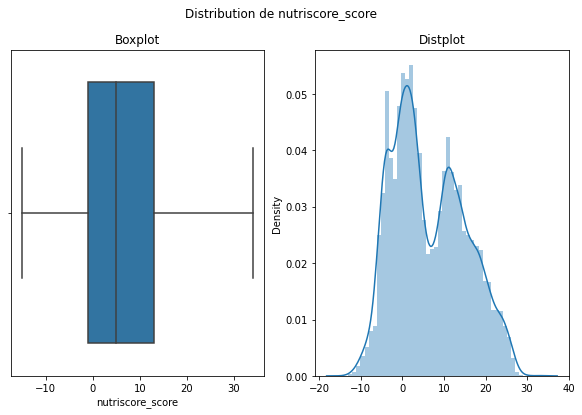

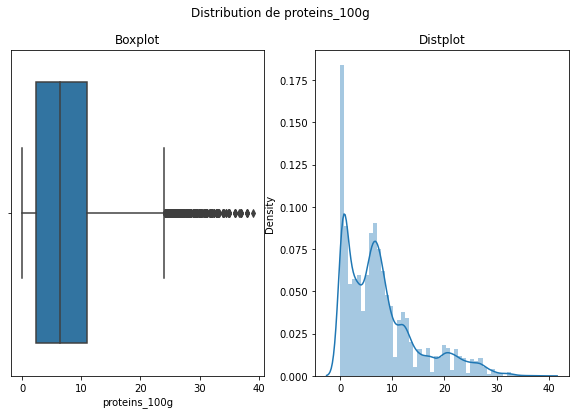

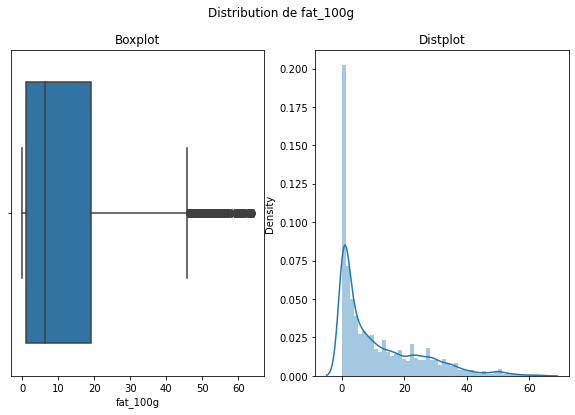

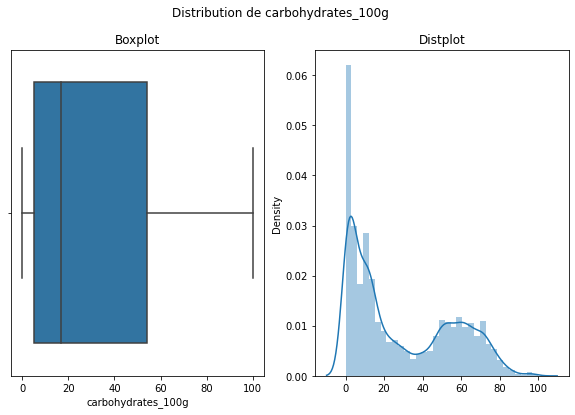

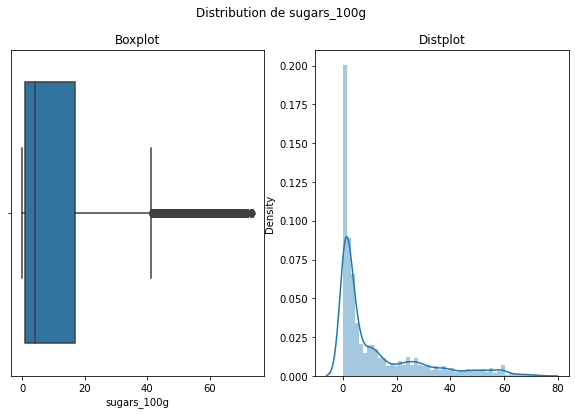

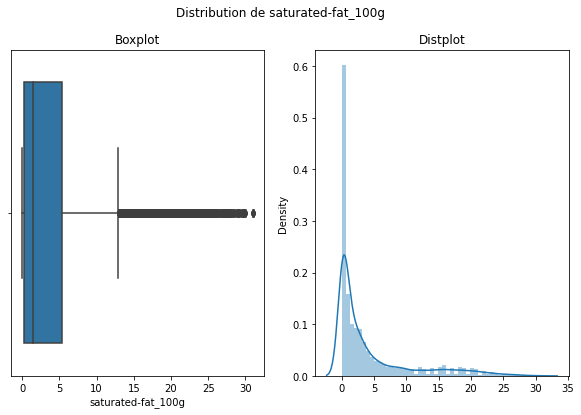

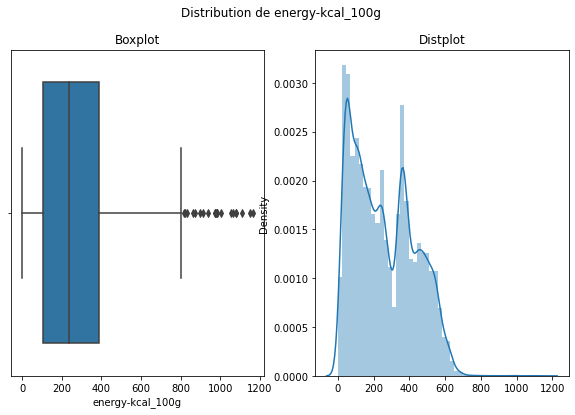

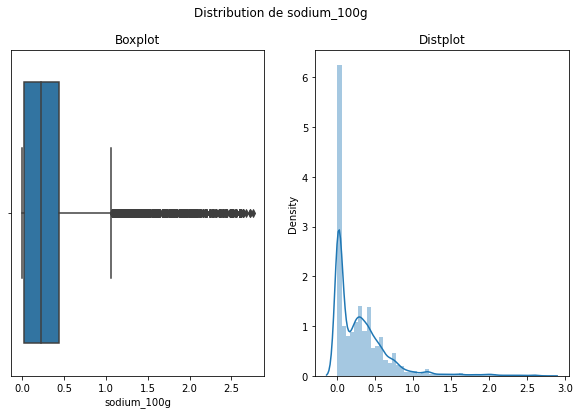

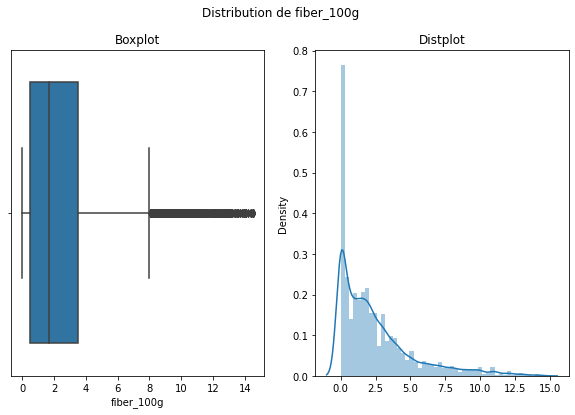

In [6]:
# Tracé des distributions et boxplot
quantitatives_columns = [x for x in df_train.select_dtypes(
    include=['float64']).columns if x in variables]
for column in quantitatives_columns:
    f, axes = plt.subplots(1, 2, figsize=(10, 6))
    f.suptitle("Distribution de %s" % column)
    ax1 = sns.boxplot(x=df[column], ax=axes[0])
    ax1.set_title("Boxplot")
    ax2 = sns.distplot(x=df[column], ax=axes[1])
    ax2.set_title("Distplot")


# 2 bosses = 2 groupes, faible et élévé

#### Variables qualitatives - Barplot

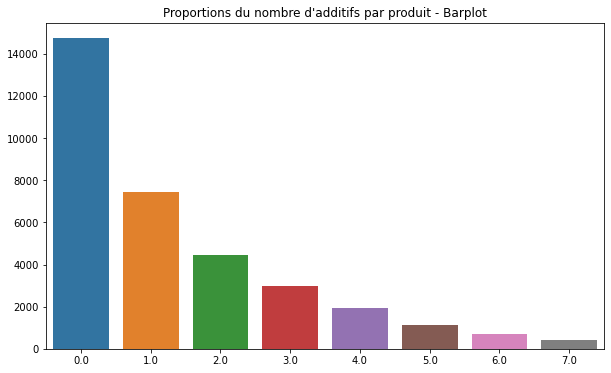

In [7]:
qualitatives_columns = [x for x in df_train.select_dtypes(
    include=['object']).columns if x in variables]
for column in qualitatives_columns:
    plt.figure(figsize=(10, 6))
    plt.title('Proportions du nombre d\'additifs par produit - Barplot')
    sns.barplot(x=df_train.additives_n.value_counts().index,
                y=df_train.additives_n.value_counts().values)
    plt.show()

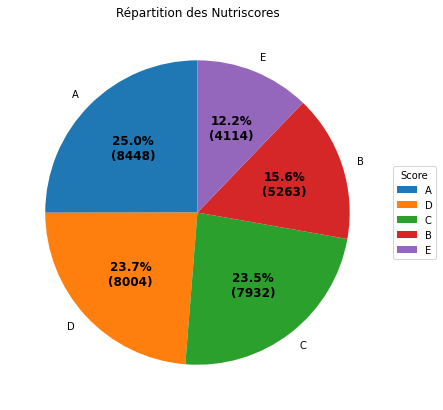

In [8]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(df.nutriscore_grade.value_counts().sort_values(ascending=False).values,
                                  autopct=lambda pct: func(
                                      pct, df.nutriscore_grade.value_counts().values),
                                  labels=df.nutriscore_grade.value_counts().index.str.upper(),
                                  startangle=90)

# Adding legend
ax.legend(wedges, df.nutriscore_grade.value_counts().index.str.upper(),
          title="Score",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Répartition des Nutriscores")

# show plot
plt.show()

In [9]:
df.shape

(33764, 58)

### Analyse multivariée

#### Pairplot

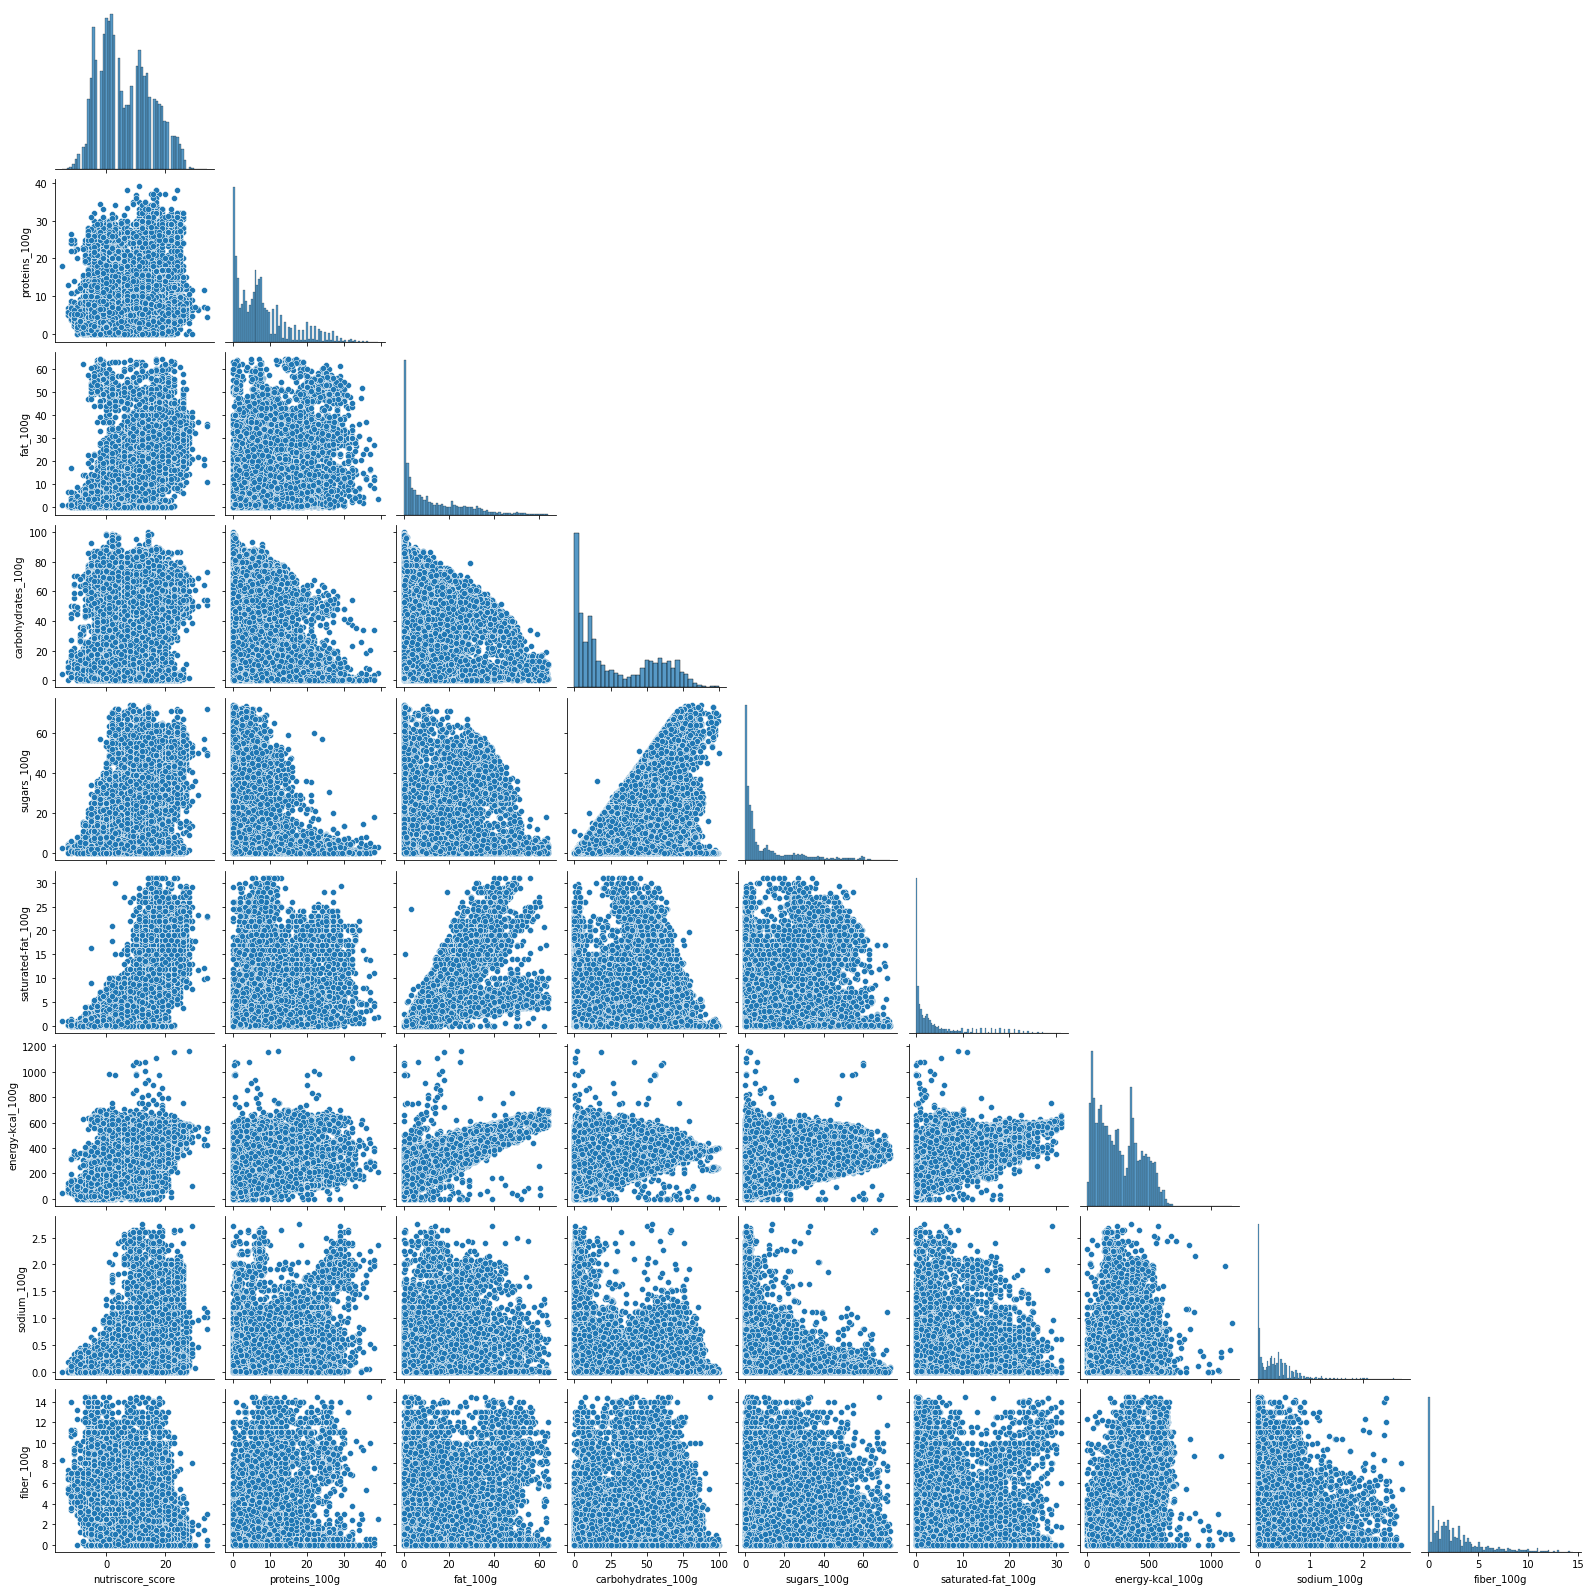

In [10]:
# Pairplot sur les variables quantitatives

g = sns.pairplot(df[quantitatives_columns], corner=True)

#### Matrice de corrélation

,nutriscore_score,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,sodium_100g,fiber_100g
nutriscore_score,1.000000,0.146885,0.613117,0.223709,0.446584,0.695132,0.586228,0.313001,-0.146982
proteins_100g,0.146885,1.000000,0.380417,-0.134374,-0.304224,0.308489,0.346225,0.378010,0.068966
fat_100g,0.613117,0.380417,1.000000,0.016868,0.073202,0.742373,0.761651,0.228959,0.216783
carbohydrates_100g,0.223709,-0.134374,0.016868,1.000000,0.558030,0.017247,0.606405,-0.233176,0.389439
sugars_100g,0.446584,-0.304224,0.073202,0.558030,1.000000,0.179722,0.348143,-0.324365,0.116327
saturated-fat_100g,0.695132,0.308489,0.742373,0.017247,0.179722,1.000000,0.570498,0.096318,0.040306
energy-kcal_100g,0.586228,0.346225,0.761651,0.606405,0.348143,0.570498,1.000000,0.077439,0.426674
sodium_100g,0.313001,0.378010,0.228959,-0.233176,-0.324365,0.096318,0.077439,1.000000,-0.107839
fiber_100g,-0.146982,0.068966,0.216783,0.389439,0.116327,0.040306,0.426674,-0.107839,1.000000


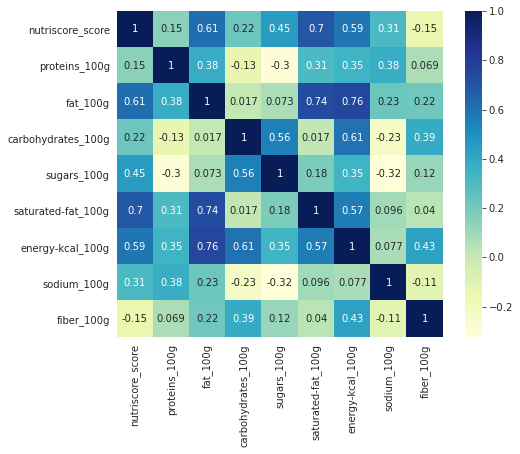

In [11]:
# Corrélation de Pearson

corr = df[quantitatives_columns].corr()
display(corr)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu")

Analyse des corrélations :
- nutriscore_score : corrélation avec fat_100g, saturated-fat_100g, energy-kcal_100g
- proteins_100g : pas de corrélation remarquable
- fat_100g : corrélation avec nutriscore_score, saturated-fat_100g, energy-kcal_100g
- carbohydrates_100g : corrélation avec sugars_100g, energy-kcal_100g
- sugars_100g : corrélation avec carbohydrates_100g
- saturated-fat_100g : corrélation avec nutriscore_score, fat_100g, energy-kcal_100g
- energy-kcal_100g : corrélation avec nutriscore_score, fat_100g, carbohydrates_100g, saturated-fat_100g
- sodium_100g : pas de corrélation remarquable

#### Test de corrélation de Spearman 

In [12]:
# function to calculate the spearman's correlation between two variables

def spearman_corr_test(variable):

    from scipy.stats import spearmanr

    # Retrieve list of variable to test correlation
    L = corr[(corr[variable] > 0.5) &
             (corr[variable].index != variable)]
    L = L.index.tolist()

    for i in L:
        # prepare data
        data1 = df[variable]
        data2 = df[i]

        # calculate spearman's correlation
        coef, p = spearmanr(data1, data2)
        print('Spearmans correlation coefficient: %.3f' % coef)

        # interpret the significance
        alpha = 0.05
        if p > alpha:
            print(variable+' and '+i +
                  ' are uncorrelated (fail to reject H0) p=%.3f\n' % p)
        else:
            print(variable+' and '+i+' are correlated (reject H0) p=%.3f\n' % p)

In [13]:
spearman_corr_test('nutriscore_score')

Spearmans correlation coefficient: 0.612
nutriscore_score and fat_100g are correlated (reject H0) p=0.000

Spearmans correlation coefficient: 0.661
nutriscore_score and saturated-fat_100g are correlated (reject H0) p=0.000

Spearmans correlation coefficient: 0.572
nutriscore_score and energy-kcal_100g are correlated (reject H0) p=0.000



#### Test de corrélation de Kendall 

In [14]:
# function to calculate the kendall's correlation between two variables

def kendall_corr_test(variable):

    from scipy.stats import kendalltau

    # Retrieve list of variable to test correlation
    L = corr[(corr[variable] > 0.5) &
             (corr[variable].index != variable)]
    L = L.index.tolist()

    for i in L:
        # prepare data
        data1 = df[variable]
        data2 = df[i]

        # calculate spearman's correlation
        coef, p = kendalltau(data1, data2)
        print('Kendall correlation coefficient: %.3f' % coef)

        # interpret the significance
        alpha = 0.05
        if p > alpha:
            print(variable+' and '+i +
                  ' are uncorrelated (fail to reject H0) p=%.3f\n' % p)
        else:
            print(variable+' and '+i+' are correlated (reject H0) p=%.3f\n' % p)

In [15]:
kendall_corr_test('nutriscore_score')

Kendall correlation coefficient: 0.447
nutriscore_score and fat_100g are correlated (reject H0) p=0.000

Kendall correlation coefficient: 0.496
nutriscore_score and saturated-fat_100g are correlated (reject H0) p=0.000

Kendall correlation coefficient: 0.420
nutriscore_score and energy-kcal_100g are correlated (reject H0) p=0.000



## Classification selon le Nutriscore et les informations nutrionnelles

### Idée d'application

- Objectif : Grouper les aliments en se basant sur le nutriscore et leur composition afin de créer des groupes homogènes. Cela permettra de voir les meilleurs produits pour chaque type d'aliments (pnns_groups_1) (les meilleurs fruits, produits laitiers etc.)
- Solution technique : classification par méthode de k-means.



### Classification par méthode des K-means

In [16]:
df[quantitatives_columns]

,nutriscore_score,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,sodium_100g,fiber_100g
70,-4.0,9.5,2.2,25.200000,0.6,0.5,160.0,0.1432,1.600
580,3.0,0.0,0.0,95.000000,0.0,0.0,250.0,0.0000,0.000
650,-2.0,18.9,10.3,0.000000,0.0,1.4,168.0,0.0400,0.000
671,1.0,8.2,6.6,17.000000,3.7,1.7,162.0,0.2920,0.900
677,13.0,5.9,17.0,24.000000,1.6,7.0,278.0,0.6000,2.700
...,...,...,...,...,...,...,...,...,...
1835115,0.0,2.0,1.1,8.100000,7.8,0.2,51.0,0.0040,0.000
1835260,25.0,3.6,14.4,71.000000,71.0,12.6,428.0,0.0000,0.000
1835837,4.0,0.3,1.3,96.599998,0.2,1.3,251.0,0.0040,0.320
1835846,4.0,0.5,1.2,96.000000,0.5,1.1,246.0,0.0160,0.005


In [17]:
mms = StandardScaler()
mms.fit(df[quantitatives_columns])
data_transformed = mms.transform(df[quantitatives_columns])

# Apprentissage du k-means sur les données

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_transformed)

# Affichage des coordonnées des clusters
kmeans.cluster_centers_

array([[-0.51429874, -0.24149576, -0.51947347, -0.68679873, -0.4325966 ,
        -0.46051732, -0.83282862, -0.0107028 , -0.37157704],
       [ 1.17616291,  0.54686811,  1.42014623,  0.07380419,  0.23478875,
         1.37200625,  1.12300654,  0.35387529,  0.12471334],
       [-0.14338857, -0.06195044, -0.37547275,  1.29565012,  0.62901766,
        -0.44516091,  0.54433852, -0.33024356,  0.61674979]])

On obtient un découpage en 3 groupes de produits homogènes :
1. Excellents produits (centroïde 0)
2. Bons produits (centroïde 1)
3. Mauvais produits (centroïde 2)

In [18]:
# array of indexes corresponding to classes around centroids, in the order of your dataset
classified_data = kmeans.labels_

# copy dataframe (may be memory intensive but just for illustration)
df_processed = df.copy()
df_processed['Cluster Class'] = pd.Series(
    classified_data, index=df_processed.index)

# Mapping for better comprehension
mapping = {0: 'Excellent', 1: 'Bad', 2: 'Good'}
df_processed['Cluster Class'] = [mapping[i]
                                 for i in df_processed['Cluster Class']]

In [19]:
df_processed[['product_name', 'pnns_groups_1', 'nutriscore_grade',
              'nutriscore_score', 'Cluster Class']].sample(n=20)

,product_name,pnns_groups_1,nutriscore_grade,nutriscore_score,Cluster Class
711857,Galette de maïs au piment,Cereals and potatoes,c,3.0,Good
755963,Riz et blé complet chocolat - Fine ligne,Cereals and potatoes,d,12.0,Good
651340,BIEN CULTIVES Haricots rouges,Cereals and potatoes,a,-8.0,Excellent
4483,Lait de coco,Beverages,c,10.0,Bad
740638,Muesli tropical,Cereals and potatoes,b,0.0,Good
998841,Pâte à Tartiner Châtaigne Chocolat Noisette,Sugary snacks,d,11.0,Good
1118175,Chocolat noir corsé dessert,Sugary snacks,d,18.0,Bad
875715,Chips aux Crevettes,Salty snacks,e,23.0,Bad
654084,Le bleu de brebis,Milk and dairy products,d,18.0,Bad
891999,Sardines au Naturel,Fish Meat Eggs,c,3.0,Excellent


Cela permettrait également de réaliser une réduction de dimension pour la suite de l'étude par le groupement en 3 catégories distinctes.

#### Analyse descriptive des clusters


Cluster : Excellent


,nutriscore_score,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,sodium_100g,fiber_100g
count,16878.000000,16878.000000,16878.000000,16878.000000,16878.000000,16878.000000,16878.000000,16878.000000,16878.000000
mean,1.935241,6.140934,4.869390,10.721061,5.070145,1.444335,115.174864,0.308543,1.468708
std,5.802043,6.702091,5.443164,9.233045,6.013759,1.904382,71.129950,0.374159,1.506033
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,1.000000,0.500000,3.300000,0.700000,0.100000,54.000000,0.040000,0.200000
50%,1.000000,3.500000,2.900000,9.400000,2.500000,0.700000,106.000000,0.248000,1.100000
75%,5.000000,8.400000,7.900000,15.000000,8.300000,2.200000,165.000000,0.420000,2.200000
max,22.000000,35.000000,55.000000,64.000000,35.800000,17.200000,660.000000,2.680000,12.200000


Catégories majoritaires : 


<AxesSubplot:title={'center':'Catégories de produits majoritaires par Cluster : Excellent'}>

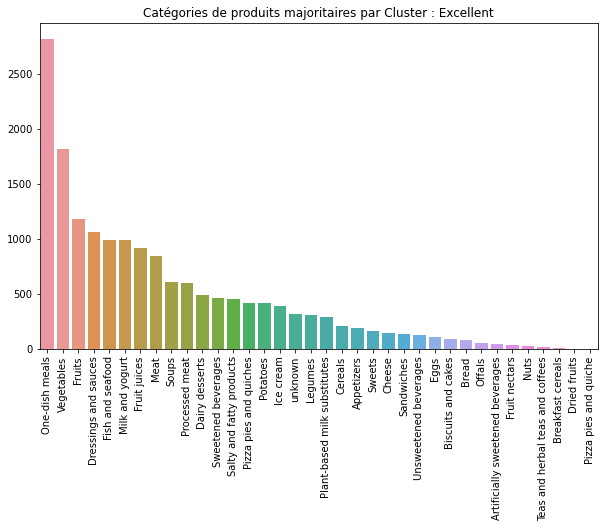

One-dish meals                      2817
Vegetables                          1818
Fruits                              1185
Dressings and sauces                1062
Fish and seafood                     991
Milk and yogurt                      989
Fruit juices                         916
Meat                                 849
Soups                                606
Processed meat                       604
Dairy desserts                       487
Sweetened beverages                  467
Salty and fatty products             456
Pizza pies and quiches               423
Potatoes                             422
Ice cream                            391
unknown                              315
Legumes                              306
Plant-based milk substitutes         295
Cereals                              213
Appetizers                           195
Sweets                               168
Cheese                               148
Sandwiches                           134
Unsweetened beve

,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade
761493,Fonds artichauts,Vegetables,-15.0,a
672401,Petits Pois Bio 100% Français,Vegetables,-13.0,a
738820,Petits pois doux extra fins,Vegetables,-13.0,a
1047180,Tofu Piment d'espelette & ail des ours,Vegetables,-13.0,a
671617,Haricots blancs cuisinés carottes et laurier,Vegetables,-13.0,a
738366,Epinards en branches,Vegetables,-13.0,a
822716,Petits pois doux,Vegetables,-13.0,a
716594,Petits pois doux extra fins surgelés,Vegetables,-13.0,a
770700,Petits Pois Doux,Vegetables,-13.0,a
738795,Petits pois extra fins,Vegetables,-13.0,a



Cluster : Good


,nutriscore_score,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,sodium_100g,fiber_100g
count,8463.000000,8463.000000,8463.000000,8463.000000,8463.000000,8463.000000,8463.000000,8463.000000,8463.000000
mean,5.174643,7.406023,6.756285,63.104928,22.202164,1.540799,350.506054,0.185989,4.135863
std,7.206315,4.776595,7.381400,13.041353,21.233639,2.059977,86.538188,0.262496,3.064520
min,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,4.000000,0.900000,55.000000,3.000000,0.200000,289.000000,0.004000,1.900000
50%,7.000000,7.600000,3.400000,64.000000,16.300000,0.600000,359.000000,0.044000,3.500000
75%,11.000000,10.800000,11.700000,72.000000,38.400001,2.000000,405.000000,0.312000,6.000000
max,26.000000,38.000000,39.000000,100.000000,73.699997,12.000000,1078.000000,2.640000,14.500000


Catégories majoritaires : 


<AxesSubplot:title={'center':'Catégories de produits majoritaires par Cluster : Good'}>

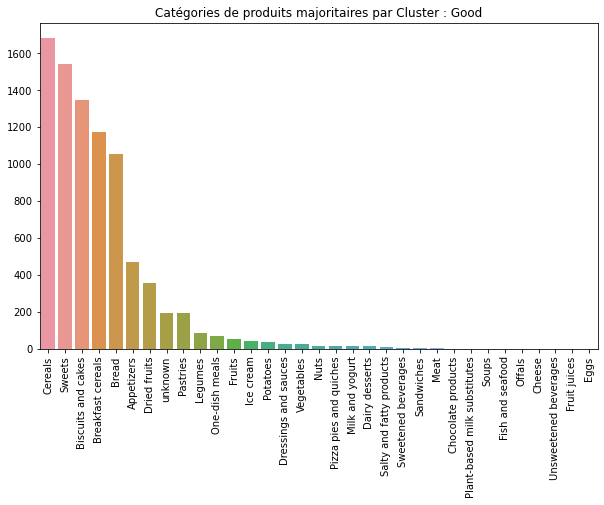

Cereals                         1680
Sweets                          1543
Biscuits and cakes              1347
Breakfast cereals               1172
Bread                           1055
Appetizers                       470
Dried fruits                     359
unknown                          196
Pastries                         195
Legumes                           86
One-dish meals                    70
Fruits                            56
Ice cream                         44
Potatoes                          36
Dressings and sauces              30
Vegetables                        28
Nuts                              16
Pizza pies and quiches            15
Milk and yogurt                   15
Dairy desserts                    14
Salty and fatty products          10
Sweetened beverages                6
Sandwiches                         4
Meat                               3
Chocolate products                 2
Plant-based milk substitutes       2
Soups                              2
F

,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade
678603,Lentille verte du Puy - AOC - AOP - 500 g - Sa...,Vegetables,-12.0,a
661590,Lentilles blondes - 500 g - Vivien Paille,Vegetables,-12.0,a
963491,Lentilles vertes du Berry,Vegetables,-12.0,a
736346,Lentille verte,Vegetables,-12.0,a
822628,Mélange quinoa boulgour Bio Monoprix,Vegetables,-11.0,a
702868,Lentilles vertes,Vegetables,-11.0,a
668551,Legumiô - lentilles corail & carottes en forme...,Cereals,-11.0,a
678614,Sabarot Lentille Corail Chaperon Rouge 500 Gr,Vegetables,-11.0,a
773575,Lentilles vertes Bio,Vegetables,-11.0,a
661530,Lentilles vertes du Berry,Vegetables,-11.0,a



Cluster : Bad


,nutriscore_score,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,sodium_100g,fiber_100g
count,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000
mean,16.686454,11.689004,30.260359,30.809849,15.820712,12.819449,449.268406,0.448735,2.806614
std,6.182848,8.063467,10.530432,24.821015,17.362989,6.821776,115.348277,0.451502,3.209845
min,-8.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,6.000000,23.000000,2.500000,0.900000,7.000000,359.000000,0.100000,0.000000
50%,17.000000,7.900000,29.000000,36.000000,5.500000,13.000000,474.000000,0.360000,1.800000
75%,21.000000,17.000000,35.400000,53.000000,29.500000,18.000000,538.000000,0.608000,4.300000
max,34.000000,39.000000,64.000000,80.000000,72.000000,31.000000,1164.000000,2.756000,14.500000


Catégories majoritaires : 


<AxesSubplot:title={'center':'Catégories de produits majoritaires par Cluster : Bad'}>

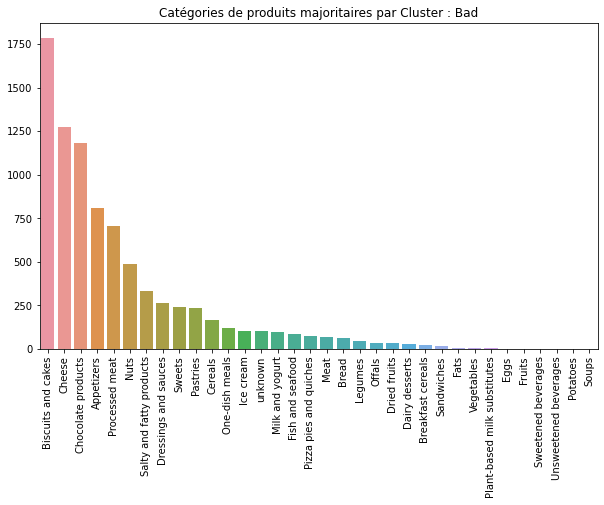

Biscuits and cakes              1782
Cheese                          1273
Chocolate products              1184
Appetizers                       811
Processed meat                   704
Nuts                             486
Salty and fatty products         331
Dressings and sauces             267
Sweets                           243
Pastries                         235
Cereals                          166
One-dish meals                   120
Ice cream                        105
unknown                          103
Milk and yogurt                   95
Fish and seafood                  87
Pizza pies and quiches            76
Meat                              68
Bread                             66
Legumes                           48
Offals                            37
Dried fruits                      35
Dairy desserts                    27
Breakfast cereals                 24
Sandwiches                        20
Fats                               8
Vegetables                         7
P

,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade
1022726,Noisettes décortiquées,Nuts,-8.0,a
932606,Noisettes décortiquées premier choix,Nuts,-6.0,a
315093,Amande grillées crues,Nuts,-6.0,a
774185,Amandes decortiquées,Nuts,-5.0,a
868497,Amandes decortiquees natures,Nuts,-5.0,a
1017692,Noix d'Amazonie,Dried fruits,-5.0,a
1293420,Amandes Décortiquées,Nuts,-5.0,a
946579,Amandes décortiquées issues de l'agriculture b...,Nuts,-5.0,a
756707,Amandes Décortiquées,Nuts,-5.0,a
605744,Amandes décortiquées,Nuts,-5.0,a


In [20]:
# Boucle sur les clusters
for i in df_processed['Cluster Class'].unique():

    # Statistiques descriptives
    print('\nCluster : '+i)
    display(df_processed[quantitatives_columns]
            [df_processed['Cluster Class'] == i].describe())

    # Barplot des catégories majoritaires
    print('Catégories majoritaires : ')
    plt.figure(figsize=(10, 6))
    plt.title('Catégories de produits majoritaires par Cluster : '+i)
    plt.xticks(rotation=90)
    display(sns.barplot(x=df_processed['pnns_groups_2'][df_processed['Cluster Class'] == i].value_counts().index,
                        y=df_processed['pnns_groups_2'][df_processed['Cluster Class'] == i].value_counts(
    ).values,
    ))
    plt.show()

    # Liste détaillée des catégories majoritaires
    display(df_processed['pnns_groups_2']
            [df_processed['Cluster Class'] == i].value_counts())

    # Classement des meilleurs produits par Cluster
    display(df_processed[['product_name', 'pnns_groups_2', 'nutriscore_score',
                          'nutriscore_grade']][df_processed['Cluster Class'] == i]
            .sort_values(by='nutriscore_score').head(10))

Interprétation :
- On note bien 3 clusters avec des valeurs de moyennes et médianes distinctes pour le nutriscore : Excellent (1,93 / 1), Good (5,17 / 7), Bad (16,68 / 17) -> Bonne cohérence des clusters.
- On confirme cette cohérence grâce aux quartiles 25% et 75%.
- On note des variances relativement élevé du nutriscore sur les Cluster Excellent et Good (groupes moins homogènes) et plus faible pour le Cluster Bad
- En moyenne pour toutes les features, le Cluster Bad est le plus homogène (Ecart-type relatif moyen = std/mean < 1) et les Clusters Excellent et Good sont relativement moins homogènes (Ecart-type relatif moyen = std/mean >= 1)

#### Interprétation graphique 

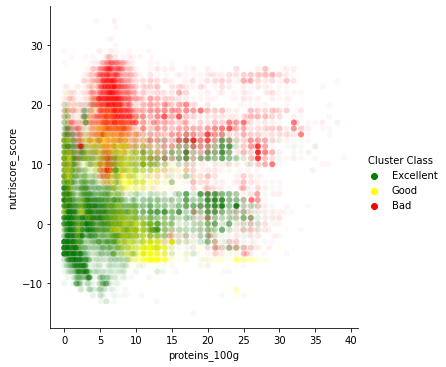

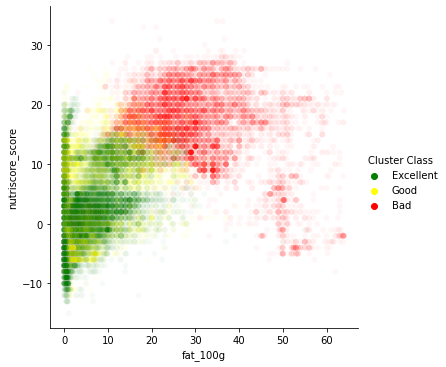

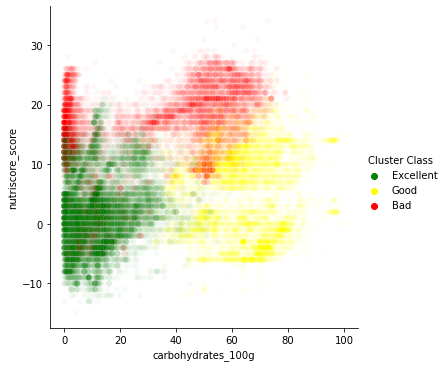

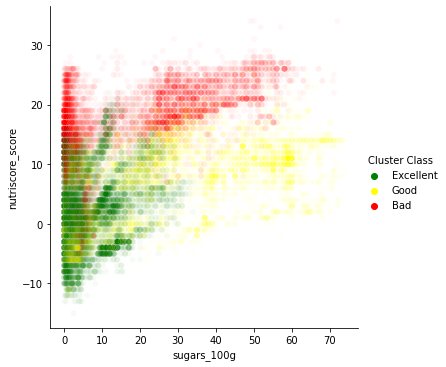

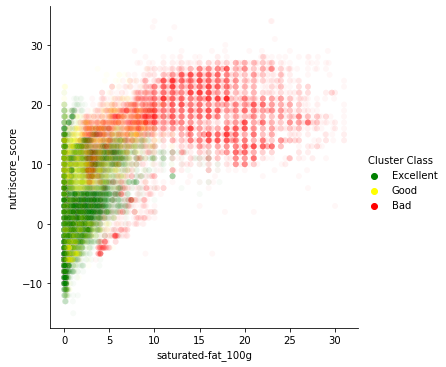

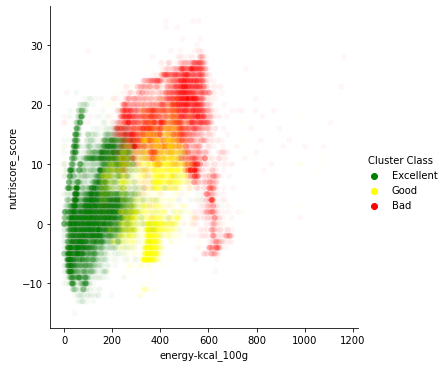

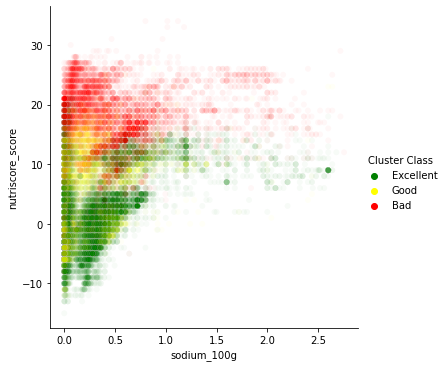

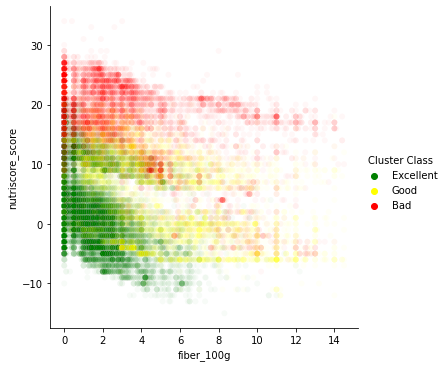

In [21]:
for i in quantitatives_columns:
    if i != 'nutriscore_score':
        sns.relplot(x=i, y='nutriscore_score', data=df_processed, hue='Cluster Class',
                    palette=['green', 'yellow', 'red'], alpha=0.03)
        plt.show()

#### Analyse d'erreurs de classification dans les clusters

In [22]:
df_processed[['product_name', 'pnns_groups_1', 'nutriscore_grade',
              'nutriscore_score', 'Cluster Class']][(df_processed['Cluster Class'] == 'Excellent')                                                     
                                                    & (df_processed['nutriscore_score'] > 18.0)].sort_values(by='nutriscore_grade')

,product_name,pnns_groups_1,nutriscore_grade,nutriscore_score,Cluster Class
493142,Yaourt à boire aux fraises mixées YOgourmand,Milk and dairy products,e,19.0,Excellent
809892,Spécialité laitière sucrée aromatisée enrichie...,Milk and dairy products,e,19.0,Excellent
810276,P'tit yop,Milk and dairy products,e,20.0,Excellent
822908,Nectar gourmand mangue origine Pérou,Beverages,e,20.0,Excellent
831981,Yaourt à boire,Milk and dairy products,e,19.0,Excellent
848992,Yaourt à boire sucré et aromatisé saveur fraise,Milk and dairy products,e,19.0,Excellent
868908,Yaourt à boire aux mangues mixées YOgourmand,Milk and dairy products,e,19.0,Excellent
868910,Fontaine à yaourt à la vanille Bourbon,Milk and dairy products,e,19.0,Excellent
901442,Nectare fraise,Beverages,e,19.0,Excellent
901590,Nu smoothie,Beverages,e,19.0,Excellent


In [23]:
df_processed[['product_name', 'pnns_groups_1', 'nutriscore_grade', 'nutriscore_score', 'Cluster Class']][(df_processed['Cluster Class'] == 'Bad')
                                                                                                         & (df_processed['nutriscore_score'] < -2.0)].sort_values(by='nutriscore_grade')

,product_name,pnns_groups_1,nutriscore_grade,nutriscore_score,Cluster Class
226761,Almonds,Salty snacks,a,-3.0,Bad
961506,Amandes Émondées,Salty snacks,a,-4.0,Bad
961470,Amandes Effilées Bio,Fruits and vegetables,a,-4.0,Bad
961469,Amandes Décortiquées Bio,Salty snacks,a,-5.0,Bad
958810,Amandes,Salty snacks,a,-4.0,Bad
958691,Amandes,Salty snacks,a,-5.0,Bad
950095,Amandes décortiquées,Salty snacks,a,-3.0,Bad
946579,Amandes décortiquées issues de l'agriculture b...,Salty snacks,a,-5.0,Bad
946564,Amandes,Salty snacks,a,-5.0,Bad
938897,Amandes decortiquees,Salty snacks,a,-3.0,Bad


On pourrait dans un premier temps penser que ces outliers proviendrait d'erreur de données ? Renseignement pour 250g au lieu de 100g peut-être ?

En regardant de plus près :

Cluster Excellent / Nutriscore mauvais : 
- On remarque qu'il s'agit presque exclusivement que de boissons et boissons lactées 
> Après quelques recherches, il semblerait que le nutriscore ne soit pas calculé de la même façon pour ces produits.

Cluster Bad / Nutriscore très bon :
- On remarque qu'il s'agit presque exclusivement de fruits secs et snacks de fruits secs.
> Après quelques recherches, en effet, les fruits secs sont notamment favorisés dans le nutriscore ainsi que les fibres et les acides gras polyinsaturés.


Solution :
- Distinguer ces catégories de produits à part entière, et leur dédier une base et un kmeans exclusif dans le cadre de l'application.

#### Distribution des variables en fonction du cluster

Distribution de : nutriscore_score


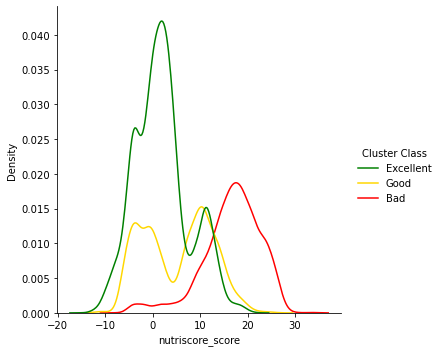

Distribution de : proteins_100g


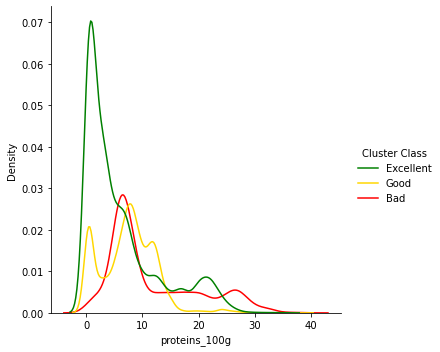

Distribution de : fat_100g


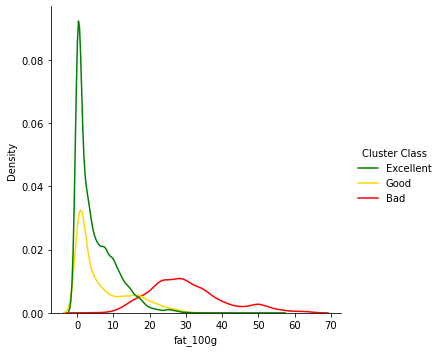

Distribution de : carbohydrates_100g


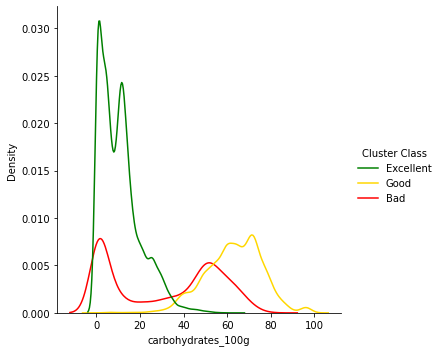

Distribution de : sugars_100g


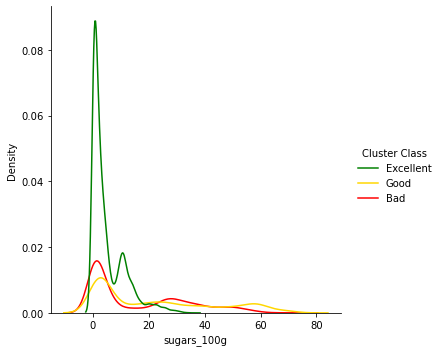

Distribution de : saturated-fat_100g


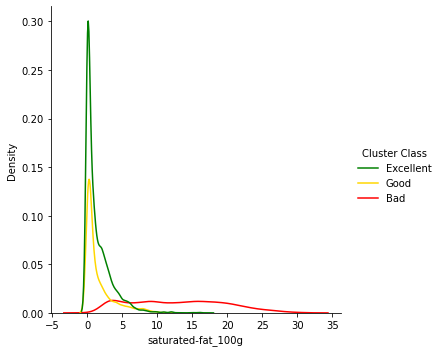

Distribution de : energy-kcal_100g


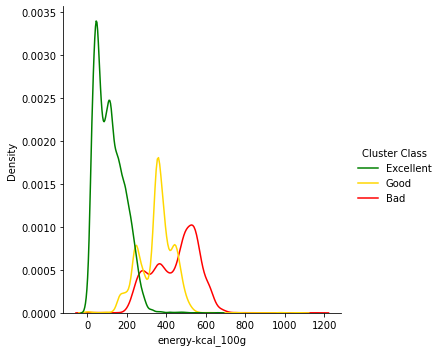

Distribution de : sodium_100g


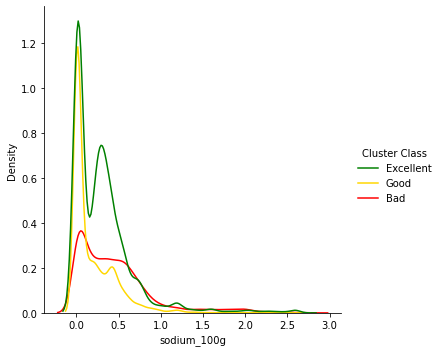

Distribution de : fiber_100g


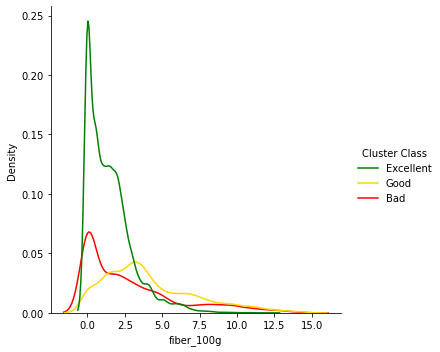

In [24]:
for i in quantitatives_columns:

    sns.displot(data=df_processed, x=i, hue="Cluster Class", kind="kde",palette=['green', 'gold', 'red'])

    print('Distribution de : '+i)
    plt.show()

In [25]:
# df_processed['pnns_groups_1'].unique()
df_processed['pnns_groups_2'].unique()

array(['Bread', 'Sweets', 'Fish and seafood', 'Cheese', 'unknown',
       'Appetizers', 'Biscuits and cakes', 'Vegetables', 'One-dish meals',
       'Legumes', 'Unsweetened beverages', 'Pizza pies and quiches',
       'Sandwiches', 'Pastries', 'Dairy desserts', 'Fruits',
       'Dried fruits', 'Dressings and sauces',
       'Plant-based milk substitutes', 'Nuts', 'Sweetened beverages',
       'Soups', 'Breakfast cereals', 'Cereals', 'Chocolate products',
       'Processed meat', 'Meat', 'Milk and yogurt',
       'Salty and fatty products', 'Ice cream', 'Fruit juices',
       'Potatoes', 'Offals', 'Artificially sweetened beverages', 'Eggs',
       'Fats', 'Fruit nectars', 'Teas and herbal teas and coffees',
       'Pizza pies and quiche'], dtype=object)

### Exemple de cas d'utilisation de l'application

#### Identification du produit

In [26]:
# Choix d'un produit aléatoire
prod = df_processed.sample(n=1)

# On identifie le produit grâce au code barre
prod_id = prod.iloc[0]['code']

# On récupère les catégories d'aliments
prod_cat_1 = prod.iloc[0]['pnns_groups_1']
prod_cat_2 = prod.iloc[0]['pnns_groups_2']
prod_main_cat = prod.iloc[0]['main_category_en']

# On récupère le Cluster Class
prod_class = prod.iloc[0]['Cluster Class']

# Classement dans le Cluster Class
temp_df_processed = df_processed[(
    df_processed['main_category_en'] == prod_main_cat)]
temp_df_processed['Best Product Rank'] = df[['nutriscore_score', 'main_category_en']].groupby('main_category_en').rank(
    method='dense')

#display(temp_df_processed.sort_values(by='Best Product Rank'))
prod_rank = temp_df_processed['Best Product Rank'][temp_df_processed['code']
                                                   == prod_id].values
prod_nutriscore_grade = temp_df_processed['nutriscore_grade'][temp_df_processed['code']
                                                              == prod_id].values


print('Produit : '+prod.iloc[0]['product_name'] +
      '\nCode : '+str(prod_id) +
      '\nCatégorie : '+prod_cat_1 +
      '\nSous catégorie : '+prod_cat_2 +
      '\nType d\'aliment : '+prod_main_cat +
      '\nApp Score : '+prod_class +
      '\nNutriscore : '+str(prod_nutriscore_grade).upper()[2:-2] +
      '\nClassement : Top '+str(round(((int(prod_rank))/(int(temp_df_processed.shape[0])))*100, 0))+' % des produits '+prod_main_cat+'('+str(prod_rank)[1:-2]+'eme/'+str(temp_df_processed.shape[0])+' produits)')

Produit : Riz basmati complet
Code : 3273120031064
Catégorie : Cereals and potatoes
Sous catégorie : Cereals
Type d'aliment : Basmati rices
App Score : Good
Nutriscore : A
Classement : Top 5.0 % des produits Basmati rices(4eme/79 produits)


In [27]:
#display(temp_df_processed.sort_values(by='Best Product Rank'))

#### Recommandation

In [28]:
print('Retrouvez les meilleurs produits '+prod_main_cat+' :\n')
print('Excellent : \n')
display(temp_df_processed[['code', 'product_name', 'brands', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en', 'nutriscore_grade', 'nutriscore_score', 'Cluster Class', 'Best Product Rank']][(
    temp_df_processed['Cluster Class'] == 'Excellent') & (temp_df_processed['main_category_en'] == prod_main_cat)].sort_values(by='Best Product Rank').head(5))
print('Good : \n')
display(temp_df_processed[['code', 'product_name', 'brands', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en', 'nutriscore_grade', 'nutriscore_score', 'Cluster Class', 'Best Product Rank']][(
    temp_df_processed['Cluster Class'] == 'Good') & (temp_df_processed['main_category_en'] == prod_main_cat)].sort_values(by='Best Product Rank').head(5))
print('Bad : \n')
display(temp_df_processed[['code', 'product_name', 'brands', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en', 'nutriscore_grade', 'nutriscore_score', 'Cluster Class', 'Best Product Rank']][(
    temp_df_processed['Cluster Class'] == 'Bad') & (temp_df_processed['main_category_en'] == prod_main_cat)].sort_values(by='Best Product Rank').head(5))

Retrouvez les meilleurs produits Basmati rices :

Excellent : 



,code,product_name,brands,pnns_groups_1,pnns_groups_2,main_category_en,nutriscore_grade,nutriscore_score,Cluster Class,Best Product Rank
902990,3560070166046,Riz cuisiné Riz Basmati,Carrefour,Composite foods,One-dish meals,Basmati rices,a,-1.0,Excellent,4.0
599690,2487464302136,Riz basmati,Uncle Ben's,Cereals and potatoes,Cereals,Basmati rices,b,1.0,Excellent,6.0
660708,3038359010415,Riz Basmati Epices du monde,Taureau aile,Cereals and potatoes,Cereals,Basmati rices,b,1.0,Excellent,6.0
755684,3263850621512,Riz Basmati Nature,Leader Price,Cereals and potatoes,Cereals,Basmati rices,b,1.0,Excellent,6.0
876961,3479410001759,Riz basmati cuit,Sévrina,Composite foods,One-dish meals,Basmati rices,b,1.0,Excellent,6.0


Good : 



,code,product_name,brands,pnns_groups_1,pnns_groups_2,main_category_en,nutriscore_grade,nutriscore_score,Cluster Class,Best Product Rank
660142,3038354536002,Riz basmati Sélection,Lustucru,Cereals and potatoes,Cereals,Basmati rices,a,-4.0,Good,1.0
1216612,5011157671222,Tilda Brown Basmati Rice,Tilda,Cereals and potatoes,Cereals,Basmati rices,a,-4.0,Good,1.0
660220,3038359000492,LUSTUCRU RIZ BASMATI 10 mn 5x180G,Lustucru,Cereals and potatoes,Cereals,Basmati rices,a,-4.0,Good,1.0
1006602,3760103144687,Riz Basmati Complet,Autour du riz,Cereals and potatoes,Cereals,Basmati rices,a,-4.0,Good,1.0
980607,3701269701369,Riz Basmati Complet,Greenweez,Cereals and potatoes,Cereals,Basmati rices,a,-4.0,Good,1.0


Bad : 



,code,product_name,brands,pnns_groups_1,pnns_groups_2,main_category_en,nutriscore_grade,nutriscore_score,Cluster Class,Best Product Rank


## Conclusion

- L'analyse exploratoire débouchant sur un clustering par k-means donne des résultats concluants sur un dataset réduit.
- Les résultats sont cohérents et les causes des quelques abberations ont été trouvées.
- La faisabilité de l'application a été prouvée par des exemples relativement robuste de cas d'utilisation.

## Annexes - Métriques de Clustering

#### Silhouette Score

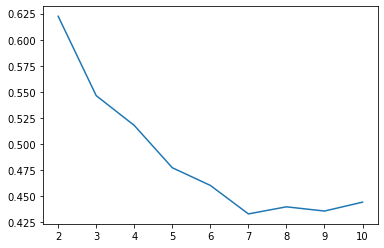

In [29]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(df[quantitatives_columns])
    labels = kmeans.labels_
    sil.append(silhouette_score(
        df[quantitatives_columns], labels, metric='euclidean'))
plt.plot(range(2, kmax+1), sil)
plt.show()

#### Méthode du coude

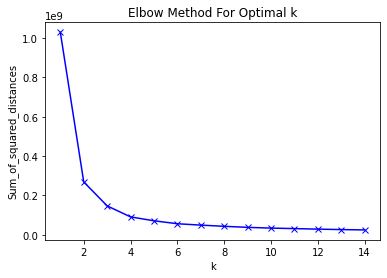

In [30]:
data_not_transformed = df[quantitatives_columns]

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_not_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()